In [1]:
import os
import sys
import glob
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline
%precision 4
plt.style.use('ggplot')

In [2]:
%install_ext http://raw.github.com/jrjohansson/version_information/master/version_information.py

Installed version_information.py. To use it, type:
  %load_ext version_information


Using numpy
====

References
----

- [Basics of numpy](http://scipy-lectures.github.io/intro/numpy/index.html)
- [Some numpy exercises](http://scipy-lectures.github.io/intro/numpy/exercises.html)
- [Advanced numpy](http://scipy-lectures.github.io/advanced/advanced_numpy/)
- [Numpy reference](http://docs.scipy.org/doc/numpy/reference/)
- [Numpy for Matlab users](http://wiki.scipy.org/NumPy_for_Matlab_Users)
- [Numpy for R users](http://mathesaurus.sourceforge.net/r-numpy.html)
- [Tutorials on Pandas](http://pandas.pydata.org/pandas-docs/stable/tutorials.html)
- [Blaze documentation](http://blaze.pydata.org/docs/dev/index.html)

Example
----

From <http://scipy-lectures.github.io/intro/numpy/exercises.html#data-statistics>

The data in [populations.txt](http://scipy-lectures.github.io/_downloads/populations.txt) describes the populations of hares and lynxes (and carrots) in northern Canada during 20 years:

Computes and print, based on the data in populations.txt...

- The mean and std of the populations of each species for the years in the period.
- Which year each species had the largest population.
- Which species has the largest population for each year. (Hint: argsort & fancy indexing of np.array(['H', 'L', 'C']))
- Which years any of the populations is above 50000. (Hint: comparisons and np.any)
- The top 2 years for each species when they had the lowest populations. (Hint: argsort, fancy indexing)
- Compare (plot) the change in hare population (see help(np.gradient)) and the number of lynxes - Check correlation (see help(np.corrcoef)).

... all without for-loops.

In [3]:
# download the data locally
if not os.path.exists('populations.txt'):
    ! wget http://scipy-lectures.github.io/_downloads/populations.txt

In [4]:
# peek at the file to see its structure
! head -n 6 populations.txt

# year	hare	lynx	carrot
1900	30e3	4e3	48300
1901	47.2e3	6.1e3	48200
1902	70.2e3	9.8e3	41500
1903	77.4e3	35.2e3	38200
1904	36.3e3	59.4e3	40600


In [5]:
# load data into a numpy array
data = np.loadtxt('populations.txt').astype('int')
data[:5, :]

array([[ 1900, 30000,  4000, 48300],
       [ 1901, 47200,  6100, 48200],
       [ 1902, 70200,  9800, 41500],
       [ 1903, 77400, 35200, 38200],
       [ 1904, 36300, 59400, 40600]])

In [6]:
# provide convenient named variables
populations = data[:, 1:]
year, hare, lynx, carrot = data.T

In [7]:
# The mean and std of the populations of each species for the years in the period
print "Mean (hare, lynx, carrot):", populations.mean(axis=0)
print "Std (hare, lynx, carrot):", populations.std(axis=0)

Mean (hare, lynx, carrot): [ 34080.9524  20166.6667  42400.    ]
Std (hare, lynx, carrot): [ 20897.9065  16254.5915   3322.5062]


In [8]:
# Which year each species had the largest population.
print "Year with largest population (hare, lynx, carrot)", 
print year[np.argmax(populations, axis=0)]

Year with largest population (hare, lynx, carrot) [1903 1904 1900]


In [9]:
# Which species has the largest population for each year.
species = ['hare', 'lynx', 'carrot']
zip(year, np.take(species, np.argmax(populations, axis=1)))

[(1900, 'carrot'),
 (1901, 'carrot'),
 (1902, 'hare'),
 (1903, 'hare'),
 (1904, 'lynx'),
 (1905, 'lynx'),
 (1906, 'carrot'),
 (1907, 'carrot'),
 (1908, 'carrot'),
 (1909, 'carrot'),
 (1910, 'carrot'),
 (1911, 'carrot'),
 (1912, 'hare'),
 (1913, 'hare'),
 (1914, 'hare'),
 (1915, 'lynx'),
 (1916, 'carrot'),
 (1917, 'carrot'),
 (1918, 'carrot'),
 (1919, 'carrot'),
 (1920, 'carrot')]

In [10]:
# Which years any of the populations is above 50000
print year[np.any(populations > 50000, axis=1)]

[1902 1903 1904 1912 1913 1914 1915]


In [11]:
# The top 2 years for each species when they had the lowest populations.
print year[np.argsort(populations, axis=0)[:2]]

[[1917 1900 1916]
 [1916 1901 1903]]


[[ 1.     -0.9179]
 [-0.9179  1.    ]]


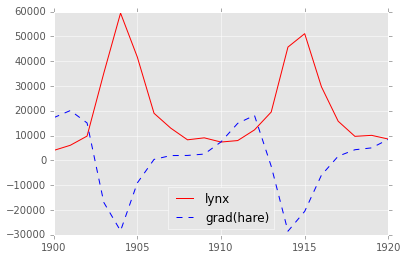

In [12]:
plt.plot(year, lynx, 'r-', year, np.gradient(hare), 'b--')
plt.legend(['lynx', 'grad(hare)'], loc='best')
print np.corrcoef(lynx, np.gradient(hare))

## NDArray

The base structure in `numpy` is `ndarray`, used to represent vectors, matrices and higher-dimensional arrays. Each `ndarray` has the following attributes:

- dtype = correspond to data types in C
- shape = dimensionns of array
- strides = number of bytes to step in each direction when traversing the array

In [13]:
x = np.array([1,2,3,4,5,6])
print x
print 'dytpe', x.dtype
print 'shape', x.shape
print 'strides', x.strides

[1 2 3 4 5 6]
dytpe int64
shape (6,)
strides (8,)


In [14]:
x.shape = (2,3)
print x
print 'dytpe', x.dtype
print 'shape', x.shape
print 'strides', x.strides

[[1 2 3]
 [4 5 6]]
dytpe int64
shape (2, 3)
strides (24, 8)


In [15]:
x = x.astype('complex')
print x
print 'dytpe', x.dtype
print 'shape', x.shape
print 'strides', x.strides

[[ 1.+0.j  2.+0.j  3.+0.j]
 [ 4.+0.j  5.+0.j  6.+0.j]]
dytpe complex128
shape (2, 3)
strides (48, 16)


### Creating arrays

In [16]:
# from lists
x_list = [(i,j) for i in range(2) for j in range(3)]
print x_list, '\n'
x_array = np.array(x_list)
print x_array

[(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2)] 

[[0 0]
 [0 1]
 [0 2]
 [1 0]
 [1 1]
 [1 2]]


In [17]:
# Using convenience functions

print np.ones((3,2)), '\n'
print np.zeros((3,2)), '\n'
print np.eye(3), '\n'
print np.diag([1,2,3]), '\n'
print np.fromfunction(lambda i, j: (i-2)**2+(j-2)**2, (5,5))

[[ 1.  1.]
 [ 1.  1.]
 [ 1.  1.]] 

[[ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]] 

[[ 1.  0.  0.]
 [ 0.  1.  0.]
 [ 0.  0.  1.]] 

[[1 0 0]
 [0 2 0]
 [0 0 3]] 

[[ 8.  5.  4.  5.  8.]
 [ 5.  2.  1.  2.  5.]
 [ 4.  1.  0.  1.  4.]
 [ 5.  2.  1.  2.  5.]
 [ 8.  5.  4.  5.  8.]]


### Array indexing

In [18]:
# Create a 10 by 6 array from normal deviates and convert to ints
n, nrows, ncols = 100, 10, 6
xs = np.random.normal(n, 15, size=(nrows, ncols)).astype('int')
xs

array([[ 84, 108,  96,  93,  82, 115],
       [ 87,  70,  96, 132, 111, 108],
       [ 96,  85, 120,  72,  62,  66],
       [112,  86,  98,  86,  74,  98],
       [ 75,  91, 116, 105,  82, 122],
       [ 95, 119,  84,  89,  93,  87],
       [118, 113,  94,  89,  67, 107],
       [120, 105,  85, 100, 131, 120],
       [ 91, 137, 103,  94, 115,  92],
       [ 73,  98,  81, 106, 128,  75]])

In [19]:
# Use slice notation
print(xs[0,0])
print(xs[-1,-1])
print(xs[3,:])
print(xs[:,0])
print(xs[::2,::2])
print(xs[2:5,2:5])

84
75
[112  86  98  86  74  98]
[ 84  87  96 112  75  95 118 120  91  73]
[[ 84  96  82]
 [ 96 120  62]
 [ 75 116  82]
 [118  94  67]
 [ 91 103 115]]
[[120  72  62]
 [ 98  86  74]
 [116 105  82]]


In [20]:
#  Indexing with list of integers
print(xs[0, [1,2,4,5]])

[108  96  82 115]


In [21]:
# Boolean indexing
print(xs[xs % 2 == 0])
xs[xs % 2 == 0] = 0 # set even entries to zero
print(xs)

[ 84 108  96  82  70  96 132 108  96 120  72  62  66 112  86  98  86  74
  98 116  82 122  84 118  94 120 100 120  94  92  98 106 128]
[[  0   0   0  93   0 115]
 [ 87   0   0   0 111   0]
 [  0  85   0   0   0   0]
 [  0   0   0   0   0   0]
 [ 75  91   0 105   0   0]
 [ 95 119   0  89  93  87]
 [  0 113   0  89  67 107]
 [  0 105  85   0 131   0]
 [ 91 137 103   0 115   0]
 [ 73   0  81   0   0  75]]


In [22]:
# Extracting lower triangular, diagonal and upper triangular matrices

a = np.arange(16).reshape(4,4)
print a, '\n'
print np.tril(a, -1), '\n'
print np.diag(np.diag(a)), '\n'
print np.triu(a, 1)

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]] 

[[ 0  0  0  0]
 [ 4  0  0  0]
 [ 8  9  0  0]
 [12 13 14  0]] 

[[ 0  0  0  0]
 [ 0  5  0  0]
 [ 0  0 10  0]
 [ 0  0  0 15]] 

[[ 0  1  2  3]
 [ 0  0  6  7]
 [ 0  0  0 11]
 [ 0  0  0  0]]


## Broadcasting, row, column and matrix operations

In [23]:
# operations across rows, cols or entire matrix
print(xs.max())
print(xs.max(axis=0)) # max of each col
print(xs.max(axis=1)) # max of each row

137
[ 95 137 103 105 131 115]
[115 111  85   0 105 119 113 131 137  81]


In [24]:
# A funcitonal rather than object-oriented approacha also wokrs
print(np.max(xs, axis=0))
print(np.max(xs, axis=1))

[ 95 137 103 105 131 115]
[115 111  85   0 105 119 113 131 137  81]


In [25]:
# broadcasting
xs = np.arange(12).reshape(2,6)
print(xs, '\n')
print(xs * 10, '\n')

# broadcasting just works when doing column-wise operations
col_means = xs.mean(axis=0)
print(col_means, '\n')
print(xs + col_means, '\n')

# but needs a little more work for row-wise operations
row_means = xs.mean(axis=1)[:, np.newaxis]
print(row_means)
print(xs + row_means)

(array([[ 0,  1,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 10, 11]]), '\n')
(array([[  0,  10,  20,  30,  40,  50],
       [ 60,  70,  80,  90, 100, 110]]), '\n')
(array([ 3.,  4.,  5.,  6.,  7.,  8.]), '\n')
(array([[  3.,   5.,   7.,   9.,  11.,  13.],
       [  9.,  11.,  13.,  15.,  17.,  19.]]), '\n')
[[ 2.5]
 [ 8.5]]
[[  2.5   3.5   4.5   5.5   6.5   7.5]
 [ 14.5  15.5  16.5  17.5  18.5  19.5]]


In [26]:
# convert matrix to have zero mean and unit standard deviation using col summary statistics
print((xs - xs.mean(axis=0))/xs.std(axis=0))

[[-1. -1. -1. -1. -1. -1.]
 [ 1.  1.  1.  1.  1.  1.]]


In [27]:
# convert matrix to have zero mean and unit standard deviation using row summary statistics
print((xs - xs.mean(axis=1)[:, np.newaxis])/xs.std(axis=1)[:, np.newaxis])

[[-1.4639 -0.8783 -0.2928  0.2928  0.8783  1.4639]
 [-1.4639 -0.8783 -0.2928  0.2928  0.8783  1.4639]]


In [28]:
# broadcasting for outer product
# e.g. create the 12x12 multiplication toable
u = np.arange(1, 13)
u[:,None] * u[None,:]

array([[  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12],
       [  2,   4,   6,   8,  10,  12,  14,  16,  18,  20,  22,  24],
       [  3,   6,   9,  12,  15,  18,  21,  24,  27,  30,  33,  36],
       [  4,   8,  12,  16,  20,  24,  28,  32,  36,  40,  44,  48],
       [  5,  10,  15,  20,  25,  30,  35,  40,  45,  50,  55,  60],
       [  6,  12,  18,  24,  30,  36,  42,  48,  54,  60,  66,  72],
       [  7,  14,  21,  28,  35,  42,  49,  56,  63,  70,  77,  84],
       [  8,  16,  24,  32,  40,  48,  56,  64,  72,  80,  88,  96],
       [  9,  18,  27,  36,  45,  54,  63,  72,  81,  90,  99, 108],
       [ 10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120],
       [ 11,  22,  33,  44,  55,  66,  77,  88,  99, 110, 121, 132],
       [ 12,  24,  36,  48,  60,  72,  84,  96, 108, 120, 132, 144]])

#### Example: Calculating pairwise distance matrix using broadcasting and vectorization

Calculate the pairwise distance matrix between the following points

- (0,0)
- (4,0)
- (4,3)
- (0,3)

In [29]:
def distance_matrix_py(pts):
    """Returns matrix of pairwise Euclidean distances. Pure Python version."""
    n = len(pts)
    p = len(pts[0])
    m = np.zeros((n, n))
    for i in range(n):
        for j in range(n):
            s = 0
            for k in range(p):
                s += (pts[i,k] - pts[j,k])**2
            m[i, j] = s**0.5
    return m

In [30]:
def distance_matrix_np(pts):
    """Returns matrix of pairwise Euclidean distances. Vectorized numpy version."""
    return np.sum((pts[None,:] - pts[:, None])**2, -1)**0.5

In [31]:
pts = np.array([(0,0), (4,0), (4,3), (0,3)])

In [32]:
distance_matrix_py(pts)

array([[ 0.,  4.,  5.,  3.],
       [ 4.,  0.,  3.,  5.],
       [ 5.,  3.,  0.,  4.],
       [ 3.,  5.,  4.,  0.]])

In [33]:
distance_matrix_np(pts)

array([[ 0.,  4.,  5.,  3.],
       [ 4.,  0.,  3.,  5.],
       [ 5.,  3.,  0.,  4.],
       [ 3.,  5.,  4.,  0.]])

In [34]:
# Broaccasting and vectorization is faster than looping
%timeit distance_matrix_py(pts)
%timeit distance_matrix_np(pts)

1000 loops, best of 3: 203 µs per loop
10000 loops, best of 3: 29.4 µs per loop


## Universal functions (Ufuncs)

Functions that work on both scalars and arrays are known as ufuncs. For arrays, ufuncs apply the function in an element-wise fashion. Use of ufuncs is an esssential aspect of vectorization and typically much more computtionally efficient than using an explicit loop over each element.

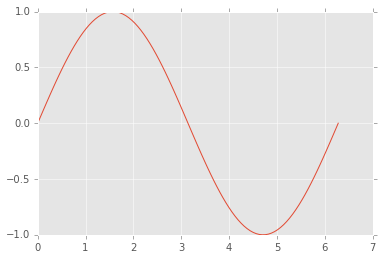

In [35]:
xs = np.linspace(0, 2*np.pi, 100)
ys = np.sin(xs) # np.sin is a universal function
plt.plot(xs, ys);

In [36]:
# operators also perform elementwise operations by default

xs = np.arange(10)
print xs
print -xs
print xs+xs
print xs*xs
print xs**3
print xs < 5

[0 1 2 3 4 5 6 7 8 9]
[ 0 -1 -2 -3 -4 -5 -6 -7 -8 -9]
[ 0  2  4  6  8 10 12 14 16 18]
[ 0  1  4  9 16 25 36 49 64 81]
[  0   1   8  27  64 125 216 343 512 729]
[ True  True  True  True  True False False False False False]


## Generalized ufucns

A universal function performs vectorized looping over scalars. A generalized ufucn performs looping over vectors or arrays. Currently, numpy only ships with a single generalized ufunc. However, they play an important role for JIT compilation with `numba`, a topic we will cover in future lectures.

In [37]:
from numpy.core.umath_tests import matrix_multiply

print matrix_multiply.signature

(m,n),(n,p)->(m,p)


In [38]:
us = np.random.random((5, 2, 3)) # 5 2x3 matrics
vs = np.random.random((5, 3, 4)) # 5 3x4 matrices
# perform matrix multiplication for each of the 5 sets of matrices
ws = matrix_multiply(us, vs) 
print ws.shape
print ws

(5, 2, 4)
[[[ 1.6525  0.7642  1.8964  0.831 ]
  [ 1.1368  0.5137  1.0785  0.7104]]

 [[ 1.0613  1.1923  1.2143  1.0832]
  [ 1.0266  0.8275  0.8543  0.6412]]

 [[ 0.8015  0.8953  0.358   0.4282]
  [ 0.3202  0.3222  0.2113  0.1709]]

 [[ 0.7747  1.0522  1.1458  0.892 ]
  [ 0.8178  1.1741  0.9486  1.0363]]

 [[ 1.5257  0.7962  1.3355  0.707 ]
  [ 1.3522  0.6577  0.9845  0.6013]]]


## Random numbers

There are two modules for (pseudo) random numbers that are commonly used. When all you need is to generate random numbers from some distribtuion, the `numpy.random` moodule is the simplest to use. When you need more information realted to a disttribution such as quantiles or the PDF, you can use the `scipy.stats` module.

#### Using `numpy.random`

[Module Reference](http://docs.scipy.org/doc/numpy/reference/routines.random.html)

In [39]:
import numpy.random as npr
npr.seed(123) # fix seed for reproducible results

In [40]:
# 10 trials of rolling a fair 6-sided 100 times
roll = 1.0/6
x = npr.multinomial(100, [roll]*6, 10)
x

array([[18, 14, 14, 18, 20, 16],
       [16, 25, 16, 14, 14, 15],
       [15, 19, 16, 12, 18, 20],
       [19, 13, 14, 18, 18, 18],
       [18, 20, 17, 16, 16, 13],
       [15, 16, 15, 16, 20, 18],
       [12, 17, 17, 18, 17, 19],
       [15, 16, 22, 21, 13, 13],
       [18, 12, 16, 17, 22, 15],
       [14, 17, 25, 15, 15, 14]])

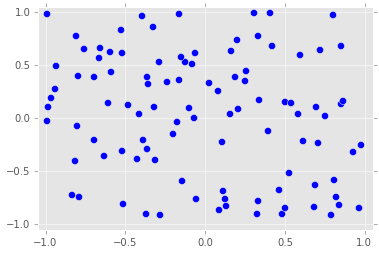

In [41]:
# uniformly distributed numbers in 2D
x = npr.uniform(-1, 1, (100, 2))
plt.scatter(x[:,0], x[:,1], s=50)
plt.axis([-1.05, 1.05, -1.05, 1.05]);

In [42]:
# ranodmly shuffling a vector
x = np.arange(10)
npr.shuffle(x)
x

array([5, 8, 6, 4, 3, 9, 1, 7, 2, 0])

In [43]:
# radnom permutations
npr.permutation(10)

array([1, 4, 9, 8, 6, 5, 3, 2, 0, 7])

In [44]:
# radnom selection without replacement
x = np.arange(10,20)
npr.choice(x, 10, replace=False)

array([14, 16, 15, 12, 19, 11, 13, 10, 18, 17])

In [45]:
# radnom selection with replacement
npr.choice(x, (5, 10), replace=True) # this is default

array([[15, 13, 10, 14, 18, 14, 19, 13, 15, 11],
       [18, 10, 19, 11, 15, 18, 18, 14, 16, 18],
       [17, 19, 12, 10, 10, 19, 19, 15, 13, 15],
       [15, 12, 12, 17, 13, 11, 13, 19, 13, 16],
       [12, 13, 11, 19, 18, 10, 12, 13, 17, 19]])

In [46]:
# toy example - estimating pi inefficiently
n = 1e6
x = npr.uniform(-1,1,(n,2))
4.0*np.sum(x[:,0]**2 + x[:,1]**2 < 1)/n

3.1416

#### Using scipy.stats

[Module refernce](http://docs.scipy.org/doc/scipy-0.14.0/reference/stats.html)

In [47]:
import scipy.stats as stats

In [48]:
# Create a "frozen" distribution - i.e. a partially applied function
dist = stats.norm(10, 2)

In [49]:
#  same a rnorm
dist.rvs(10)

array([ 11.629 ,   9.5777,   8.5607,   8.5777,   8.6464,  11.5398,
        10.8751,  11.8244,  10.1772,   9.3056])

In [50]:
# same as pnorm
dist.pdf(np.linspace(5, 15, 10))

array([ 0.0088,  0.0301,  0.076 ,  0.141 ,  0.1919,  0.1919,  0.141 ,
        0.076 ,  0.0301,  0.0088])

In [51]:
# same as dnorm
dist.cdf(np.linspace(5, 15, 11))

array([ 0.0062,  0.0228,  0.0668,  0.1587,  0.3085,  0.5   ,  0.6915,
        0.8413,  0.9332,  0.9772,  0.9938])

In [52]:
# same as qnorm
dist.ppf(dist.cdf(np.linspace(5, 15, 11)))

array([  5.,   6.,   7.,   8.,   9.,  10.,  11.,  12.,  13.,  14.,  15.])

## Linear algebra

In general, the linear algebra functions can be found in scipy.linalg. You can also get access to BLAS and LAPACK function via scipy.linagl.blas and scipy.linalg.lapack.

In [53]:
import scipy.linalg as la

In [54]:
A = np.array([[1,2],[3,4]])
b = np.array([1,4])
print(A)
print(b)

[[1 2]
 [3 4]]
[1 4]


In [55]:
# Matrix operations
import numpy as np
import scipy.linalg as la
from functools import reduce

A = np.array([[1,2],[3,4]])
print(np.dot(A, A))
print(A)
print(la.inv(A))
print(A.T)

[[ 7 10]
 [15 22]]
[[1 2]
 [3 4]]
[[-2.   1. ]
 [ 1.5 -0.5]]
[[1 3]
 [2 4]]


In [56]:
x = la.solve(A, b) # do not use x = dot(inv(A), b) as it is inefficient and numerically unstable
print(x)
print(np.dot(A, x) - b)

[ 2.  -0.5]
[ 0.  0.]


### Matrix decompositions

In [57]:
A = np.floor(npr.normal(100, 15, (6, 10)))
print(A)

[[  94.   82.  125.  108.  105.   88.   99.   82.   97.  112.]
 [  83.  124.   67.  103.   73.  111.  125.   81.  122.   62.]
 [  93.   84.  107.  107.   80.   85.   96.   89.   85.  102.]
 [ 116.  116.   64.   98.   82.   98.  121.   70.  122.   98.]
 [ 118.  108.  103.  102.   68.   98.   88.   78.  103.   95.]
 [ 112.  115.   74.   80.  106.  104.  114.  105.   80.   99.]]


In [58]:
P, L, U = la.lu(A)
print(np.dot(P.T, A))
print
print(np.dot(L, U))

[[ 118.  108.  103.  102.   68.   98.   88.   78.  103.   95.]
 [  83.  124.   67.  103.   73.  111.  125.   81.  122.   62.]
 [  94.   82.  125.  108.  105.   88.   99.   82.   97.  112.]
 [ 116.  116.   64.   98.   82.   98.  121.   70.  122.   98.]
 [ 112.  115.   74.   80.  106.  104.  114.  105.   80.   99.]
 [  93.   84.  107.  107.   80.   85.   96.   89.   85.  102.]]

[[ 118.  108.  103.  102.   68.   98.   88.   78.  103.   95.]
 [  83.  124.   67.  103.   73.  111.  125.   81.  122.   62.]
 [  94.   82.  125.  108.  105.   88.   99.   82.   97.  112.]
 [ 116.  116.   64.   98.   82.   98.  121.   70.  122.   98.]
 [ 112.  115.   74.   80.  106.  104.  114.  105.   80.   99.]
 [  93.   84.  107.  107.   80.   85.   96.   89.   85.  102.]]


In [59]:
Q, R = la.qr(A)
print(A)
print
print(np.dot(Q, R))

[[  94.   82.  125.  108.  105.   88.   99.   82.   97.  112.]
 [  83.  124.   67.  103.   73.  111.  125.   81.  122.   62.]
 [  93.   84.  107.  107.   80.   85.   96.   89.   85.  102.]
 [ 116.  116.   64.   98.   82.   98.  121.   70.  122.   98.]
 [ 118.  108.  103.  102.   68.   98.   88.   78.  103.   95.]
 [ 112.  115.   74.   80.  106.  104.  114.  105.   80.   99.]]

[[  94.   82.  125.  108.  105.   88.   99.   82.   97.  112.]
 [  83.  124.   67.  103.   73.  111.  125.   81.  122.   62.]
 [  93.   84.  107.  107.   80.   85.   96.   89.   85.  102.]
 [ 116.  116.   64.   98.   82.   98.  121.   70.  122.   98.]
 [ 118.  108.  103.  102.   68.   98.   88.   78.  103.   95.]
 [ 112.  115.   74.   80.  106.  104.  114.  105.   80.   99.]]


In [60]:
U, s, V = la.svd(A)
m, n = A.shape
S =  np.zeros((m, n))
for i, _s in enumerate(s):
    S[i,i] = _s
print(reduce(np.dot, [U, S, V]))

[[  94.   82.  125.  108.  105.   88.   99.   82.   97.  112.]
 [  83.  124.   67.  103.   73.  111.  125.   81.  122.   62.]
 [  93.   84.  107.  107.   80.   85.   96.   89.   85.  102.]
 [ 116.  116.   64.   98.   82.   98.  121.   70.  122.   98.]
 [ 118.  108.  103.  102.   68.   98.   88.   78.  103.   95.]
 [ 112.  115.   74.   80.  106.  104.  114.  105.   80.   99.]]


In [61]:
B = np.cov(A)
print(B)

[[ 187.7333 -182.4667   94.9333 -105.4444    1.2    -137.2   ]
 [-182.4667  609.6556  -83.3111  371.0556   90.8778   70.5667]
 [  94.9333  -83.3111   97.2889  -48.8889   45.0222  -79.8   ]
 [-105.4444  371.0556  -48.8889  438.5     145.5     109.0556]
 [   1.2      90.8778   45.0222  145.5     215.4333  -39.7667]
 [-137.2      70.5667  -79.8     109.0556  -39.7667  234.1   ]]


In [62]:
u, V = la.eig(B)
print(np.dot(B, V))
print
print(np.real(np.dot(V, np.diag(u))))

[[-280.8911  157.1032   12.1003  -60.7161    8.8142   -1.5134]
 [ 739.1179   34.4268    3.8974    4.3778   14.9092 -122.8749]
 [-134.1449  128.3162  -11.0569   -6.6382   37.3675   13.4467]
 [ 598.7992   77.4348   -5.3372  -52.7843  -14.996    94.553 ]
 [ 170.8339  193.7335    5.8732   67.6135    1.1042   90.1451]
 [ 199.7105 -218.1547    6.1467   -5.6295   26.3372  101.0444]]

[[-280.8911  157.1032   12.1003  -60.7161    8.8142   -1.5134]
 [ 739.1179   34.4268    3.8974    4.3778   14.9092 -122.8749]
 [-134.1449  128.3162  -11.0569   -6.6382   37.3675   13.4467]
 [ 598.7992   77.4348   -5.3372  -52.7843  -14.996    94.553 ]
 [ 170.8339  193.7335    5.8732   67.6135    1.1042   90.1451]
 [ 199.7105 -218.1547    6.1467   -5.6295   26.3372  101.0444]]


In [63]:
C = la.cholesky(B)
print(np.dot(C.T, C))
print
print(B)

[[ 187.7333 -182.4667   94.9333 -105.4444    1.2    -137.2   ]
 [-182.4667  609.6556  -83.3111  371.0556   90.8778   70.5667]
 [  94.9333  -83.3111   97.2889  -48.8889   45.0222  -79.8   ]
 [-105.4444  371.0556  -48.8889  438.5     145.5     109.0556]
 [   1.2      90.8778   45.0222  145.5     215.4333  -39.7667]
 [-137.2      70.5667  -79.8     109.0556  -39.7667  234.1   ]]

[[ 187.7333 -182.4667   94.9333 -105.4444    1.2    -137.2   ]
 [-182.4667  609.6556  -83.3111  371.0556   90.8778   70.5667]
 [  94.9333  -83.3111   97.2889  -48.8889   45.0222  -79.8   ]
 [-105.4444  371.0556  -48.8889  438.5     145.5     109.0556]
 [   1.2      90.8778   45.0222  145.5     215.4333  -39.7667]
 [-137.2      70.5667  -79.8     109.0556  -39.7667  234.1   ]]


### Finding the covariance matrix

In [64]:
np.random.seed(123)
x = np.random.multivariate_normal([10,10], np.array([[3,1],[1,5]]), 10)
# create a zero mean array
u = x - x.mean(0)
cov = np.dot(u.T, u)/(10-1)
print cov, '\n'
print np.cov(x.T)

[[ 5.1286  3.0701]
 [ 3.0701  9.0755]] 

[[ 5.1286  3.0701]
 [ 3.0701  9.0755]]


### Least squares solution

Suppose we want to solve a system of noisy linear equations

$$
y_1 = b_0 x_1 + b_1 \\
y_2 = b_0 x_2 + b_1 \\
y_3 = b_0 x_2 + b_1 \\
y_4 = b_0 x_4 + b_1 \\
$$

Since the system is noisy (implies full rank) and overdetermined, we cannot find an exact solution. Instead, we will look for the least squares solution. First we can rewrrite in matrix notation $Y = AB$, treating $b_1$ as the coefficient of $x^0 = 1$:

$$
\left(
\begin{array}{c}
y_1 \\
y_2 \\
y_3 \\
y_4 
\end{array} 
\right) = \left( \begin{array}{cc}
x_1 & 1 \\
x_2 & 1 \\
x_3 & 1 \\
x_4 & 1 \end{array} \right)
\left( 
\begin{array}{cc}
b_0 & b_1 
\end{array}
\right)
$$

The solution of this (i.e. the $B$ matrix) is solved by multipling the psudoinverse of $A$ (the Vandermonde matrix) with $Y$

$$
(A^\text{T}A)^{-1}A^\text{T} Y
$$

Note that higher order polynomials have the same structure and can be solved in the same way

$$
\left(
\begin{array}{c}
y_1 \\
y_2 \\
y_3 \\
y_4 
\end{array} 
\right) = \left( \begin{array}{ccc}
x_1^2 & x_1 & 1 \\
x_2^2 & x_2 & 1 \\
x_3^2 & x_3 & 1 \\
x_4^2 & x_4 & 1 \end{array} \right)
\left( 
\begin{array}{ccc}
b_0 & b_1 & b_2
\end{array}
\right)
$$

('lstsq solution                ', array([ 5.5899, -1.4177]))
('pseudoinverse solution        ', array([ 5.5899, -1.4177]))
('normal euqation solution      ', array([ 5.5899, -1.4177]))


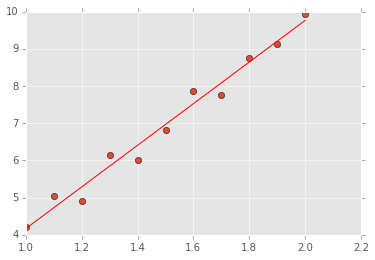

In [65]:
# Set up a system of 11 linear equations
x = np.linspace(1,2,11)
y = 6*x - 2 + npr.normal(0, 0.3, len(x))

# Form the VanderMonde matrix
A = np.vstack([x, np.ones(len(x))]).T

# The linear algebra librayr has a lstsq() function 
# that will do the above calculaitons for us

b, resids, rank, sv = la.lstsq(A, y)

# Check against pseudoinverse and the normal equation
print("lstsq solution".ljust(30), b)
print("pseudoinverse solution".ljust(30), np.dot(la.pinv(A), y))
print("normal euqation solution".ljust(30), np.dot(np.dot(la.inv(np.dot(A.T, A)), A.T), y))

# Now plot the solution
xi = np.linspace(1,2,11)
yi = b[0]*xi + b[1]

plt.plot(x, y, 'o')
plt.plot(xi, yi, 'r-');

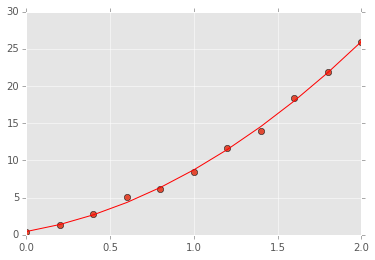

In [66]:
# As advertised, this works for finding coeefficeints of a polynomial too

x = np.linspace(0,2,11)
y = 6*x*x + .5*x + 2 + npr.normal(0, 0.6, len(x))
plt.plot(x, y, 'o')
A = np.vstack([x*x, x, np.ones(len(x))]).T
b = la.lstsq(A, y)[0]

xi = np.linspace(0,2,11)
yi = b[0]*xi*xi + b[1]*xi + b[2]
plt.plot(xi, yi, 'r-');

[(6, -250.9964),
 (7, 819.7606),
 (1, -909.5724),
 (5, 449.7862),
 (7, -91.2660),
 (9, 15.5274)]

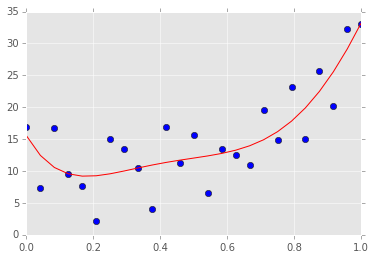

In [67]:
# It is important to understand what is going on,
# but we don't have to work so hard to fit a polynomial

b = np.random.randint(0, 10, 6)
x = np.linspace(0, 1, 25)
y = np.poly1d(b)(x) 
y += np.random.normal(0, 5, y.shape)

p = np.poly1d(np.polyfit(x, y, len(b)-1))
plt.plot(x, y, 'bo')
plt.plot(x, p(x), 'r-')
list(zip(b, p.coeffs))

<font color=red>Exercises</font>
----

**1**. Find the row, column and overall means for the following matrix:

```python
m = np.arange(12).reshape((3,4))
```

In [68]:
# YOUR CODE HERE

m = np.arange(12).reshape((3,4))
print m
print

print "OVerall", m.mean()
print "Row", m.mean(1)
print "Columne", m.mean(0)

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]

OVerall 5.5
Row [ 1.5  5.5  9.5]
Columne [ 4.  5.  6.  7.]


**2**. Find the outer product of the following two vecotrs

```python
u = np.array([1,3,5,7])
v = np.array([2,4,6,8])
```

Do this in the following ways:

- Using the function `outer` in numpy
- Using a nested for loop or list comprehension
- Using numpy broadcasting operatoins

In [69]:
# YOUR CODE HERE

u = np.array([1,3,5,7])
v = np.array([2,4,6,8])

print np.outer(u, v)
print
print np.array([[u_ * v_ for v_ in v] for u_ in u])
print
print u[:,None] * v[None,:]

[[ 2  4  6  8]
 [ 6 12 18 24]
 [10 20 30 40]
 [14 28 42 56]]

[[ 2  4  6  8]
 [ 6 12 18 24]
 [10 20 30 40]
 [14 28 42 56]]

[[ 2  4  6  8]
 [ 6 12 18 24]
 [10 20 30 40]
 [14 28 42 56]]


**3**. Create a 10 by 6 matrix of random uniform numbers. Set all rows with *any* entry less than 0.1 to be zero. For example, here is a 4 by 10 version:

```python
array([[ 0.49722235,  0.88833973,  0.07289358,  0.12375223,  0.39659254,
         0.70267114],
       [ 0.3954172 ,  0.889077  ,  0.71286225,  0.06353112,  0.68107965,
         0.17186995],
       [ 0.74821206,  0.92692111,  0.24871227,  0.26904958,  0.80410194,
         0.22304055],
       [ 0.22582605,  0.37671244,  0.96510957,  0.88819053,  0.14654176,
         0.33987323]])
```

becomes

```python
array([[ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ],
       [ 0.74821206,  0.92692111,  0.24871227,  0.26904958,  0.80410194,
         0.22304055],
       [ 0.22582605,  0.37671244,  0.96510957,  0.88819053,  0.14654176,
         0.33987323]])
```

Hint: Use the following numpy functions - `np.random.random`, `np.any` as well as Boolean indexing and the axis argument.

In [70]:
# YOUR CODE HERE

xs = np.random.random((10,6))
print xs
print
xs[(xs < 0.1).any(axis=1), :] = 0
print xs

[[ 0.5117  0.9098  0.2184  0.3631  0.855   0.7114]
 [ 0.3929  0.2313  0.3802  0.5492  0.5567  0.0041]
 [ 0.638   0.0576  0.043   0.8751  0.2926  0.7628]
 [ 0.3679  0.8735  0.0294  0.552   0.2402  0.8848]
 [ 0.4602  0.1932  0.2937  0.8179  0.5595  0.6779]
 [ 0.8091  0.8686  0.418   0.0589  0.4785  0.5212]
 [ 0.5806  0.3092  0.9199  0.6553  0.3492  0.5411]
 [ 0.4491  0.2823  0.2959  0.5635  0.7152  0.5176]
 [ 0.352   0.6328  0.8731  0.1679  0.9875  0.3494]
 [ 0.8262  0.0655  0.0054  0.8869  0.9113  0.1994]]

[[ 0.5117  0.9098  0.2184  0.3631  0.855   0.7114]
 [ 0.      0.      0.      0.      0.      0.    ]
 [ 0.      0.      0.      0.      0.      0.    ]
 [ 0.      0.      0.      0.      0.      0.    ]
 [ 0.4602  0.1932  0.2937  0.8179  0.5595  0.6779]
 [ 0.      0.      0.      0.      0.      0.    ]
 [ 0.5806  0.3092  0.9199  0.6553  0.3492  0.5411]
 [ 0.4491  0.2823  0.2959  0.5635  0.7152  0.5176]
 [ 0.352   0.6328  0.8731  0.1679  0.9875  0.3494]
 [ 0.      0.      0.      0.

**4**. Use `np.linspace` to create an array of 100 numbers between 0 and $2\pi$ (includsive). 

- Extract every 10th element using slice notation
- Reverse the array using slice notation
- Extract elements where the absolute difference between the sine and cosine functions evaluated at that element is less than 0.1
- Make a plot showing the sin and cos functions and indicate where they are close

[ 0.      0.6347  1.2693  1.904   2.5387  3.1733  3.808   4.4427  5.0773
  5.712 ]

[ 6.2832  6.2197  6.1563  6.0928  6.0293  5.9659  5.9024  5.8389  5.7755
  5.712   5.6485  5.5851  5.5216  5.4581  5.3947  5.3312  5.2677  5.2043
  5.1408  5.0773  5.0139  4.9504  4.8869  4.8235  4.76    4.6965  4.6331
  4.5696  4.5061  4.4427  4.3792  4.3157  4.2523  4.1888  4.1253  4.0619
  3.9984  3.9349  3.8715  3.808   3.7445  3.6811  3.6176  3.5541  3.4907
  3.4272  3.3637  3.3003  3.2368  3.1733  3.1099  3.0464  2.9829  2.9195
  2.856   2.7925  2.7291  2.6656  2.6021  2.5387  2.4752  2.4117  2.3483
  2.2848  2.2213  2.1579  2.0944  2.0309  1.9675  1.904   1.8405  1.7771
  1.7136  1.6501  1.5867  1.5232  1.4597  1.3963  1.3328  1.2693  1.2059
  1.1424  1.0789  1.0155  0.952   0.8885  0.8251  0.7616  0.6981  0.6347
  0.5712  0.5077  0.4443  0.3808  0.3173  0.2539  0.1904  0.1269  0.0635
  0.    ]

[ 0.7616  0.8251  3.8715  3.9349]



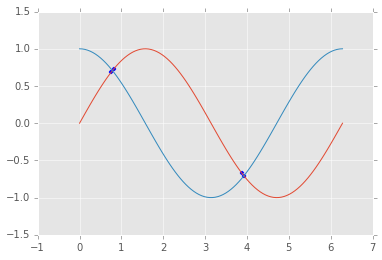

In [71]:
# YOUR CODE HERE

xs = np.linspace(0, 2*np.pi, 100)
print xs[::10]
print
print xs[::-1]
print
idx = np.abs(np.sin(xs)-np.cos(xs)) < 0.1
print xs[idx]
print 
plt.scatter(xs[idx], np.sin(xs[idx]))
plt.plot(xs, np.sin(xs), xs, np.cos(xs));

**5**. Create a matrix that shows the 10 by 10 multiplication table.

- Find the trace of the matrix
- Extract the anto-diagonal (this should be `array([10, 18, 24, 28, 30, 30, 28, 24, 18, 10])`)
- Extract the diagnoal offset by 1 upwards (this should be `array([ 2,  6, 12, 20, 30, 42, 56, 72, 90])`)

In [72]:
# YOUR CODE HERE

ns = np.arange(1, 11)
m = ns[:, None] * ns[None, :]
print m
print 
print m.trace()
print 
print np.flipud(m).diagonal()
print
print m.diagonal(offset=1)

[[  1   2   3   4   5   6   7   8   9  10]
 [  2   4   6   8  10  12  14  16  18  20]
 [  3   6   9  12  15  18  21  24  27  30]
 [  4   8  12  16  20  24  28  32  36  40]
 [  5  10  15  20  25  30  35  40  45  50]
 [  6  12  18  24  30  36  42  48  54  60]
 [  7  14  21  28  35  42  49  56  63  70]
 [  8  16  24  32  40  48  56  64  72  80]
 [  9  18  27  36  45  54  63  72  81  90]
 [ 10  20  30  40  50  60  70  80  90 100]]

385

[10 18 24 28 30 30 28 24 18 10]

[ 2  6 12 20 30 42 56 72 90]


**6**. Diagonalize the follwoing matrix
```python
A = np.array([
    [1,  2, 1],
    [6, -1, 0],
    [-1,-2,-1]
])
```
In other words, find the invertible matrix $P$ and the diagonal matrix $D$ such that $A = PDP^{-1} $. Confirm by calculating the value of $PDP^{-1} $.

- Do this mnaully
- Then use numpy.linalg functions to do the same

In [108]:
# YOUR CODE HERE

A = np.array([
    [1,  2, 1],
    [6, -1, 0],
    [-1,-2,-1]
])

dotm = lambda *args: reduce(np.dot, args)

u, V = la.eig(A)
P = V
D = np.diag(u)
print P
print 
print np.real_if_close(np.round(u))
print

np.real_if_close(np.round(dotm(P, D, la.inv(P)), 6))

[[ 0.4082 -0.4851 -0.0697]
 [-0.8165 -0.7276 -0.418 ]
 [-0.4082  0.4851  0.9058]]

[-4.  3.  0.]



array([[ 1.,  2.,  1.],
       [ 6., -1., -0.],
       [-1., -2., -1.]])

#### Manual solution involves finding roots of characteristic polynomial and solving the resulting linear systems for each equation

The code below just intorduces some of the symbolic algebra capabilities of Python ...

In [110]:
from sympy import symbols, init_printing, roots, solve, eye
from sympy.matrices import Matrix

init_printing()

x = symbols('x')

In [119]:
M = Matrix([
    [1,  2, 1],
    [6, -1, 0],
    [-1,-2,-1]
])

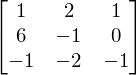

In [120]:
M

In [121]:
# Find characteristic polynomial
poly = M.charpoly(x)
poly.as_poly()

In [122]:
# eigenvalues are the roots
roots(poly)

**7**. Use the function provided below to visualize matrix multiplication as a geometric transformation by experiment with differnt values of the matrix $m$.

- What does a diagonal matrix do to the origianl vectors?
- What does a non-invertible matrix do to the original vectors?
- What property results in matrices that preserves the area of the parallelogram spanned by the two vectors?
- What property results in matrices that also preserve the length and angle of the original vectors?
- What additional property is necessary to preserve the orientation of the original vecotrs?
- What does the transpose of the matrix that preserves the length and angle of the original vectors do?
- Write a function that when given any two non-colinear 2D vectors u, v, finds a transformation that converts u into e1 (1,0) and v into e2 (0,1).

In [74]:
#  Provided function
def plot_matrix_transform(m):
    """Show the geometric effect of m on the standard unit vectors e1 and e2."""

    e1 = np.array([1,0])
    e2 = np.array([0,1])
    v1 = np.dot(m, e1)
    v2 = np.dot(m, e2)

    X = np.zeros((2,2))
    Y = np.zeros((2,2))
    pts = np.array([e1,e2,v1,v2])
    U = pts[:, 0]
    V = pts[:, 1]
    C = [0,1,0,1]

    xmin = min(-1, U.min())
    xmax = max(1, U.max())
    ymin = min(-1, V.min())
    ymax = max(-1, V.max())

    plt.figure(figsize=(6,6))
    plt.quiver(X, Y, U, V, C, angles='xy', scale_units='xy', scale=1)
    plt.axis([xmin, xmax, ymin, ymax]);

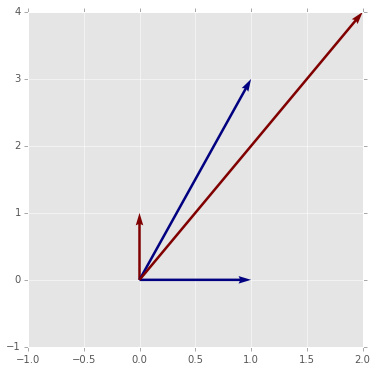

In [75]:
### Example usage
m = np.array([[1,2],[3,4]])
plot_matrix_transform(m)

In [76]:
# YOUR CODE HERE

A1 = np.diag([2,3])
A2 = np.array([[2,3],[1,1.5]])
A3 = np.array([[np.cos(1), -np.sin(1)], [np.sin(1), np.cos(1)]])
A4 = np.array([[np.cos(1), np.sin(1)], [np.sin(1), -np.cos(1)]])

print A1, la.det(A1)
print
print A2, la.det(A2)
print
print A3, la.det(A3)
print
print A4, la.det(A4)

[[2 0]
 [0 3]] 6.0

[[ 2.   3. ]
 [ 1.   1.5]] 0.0

[[ 0.5403 -0.8415]
 [ 0.8415  0.5403]] 1.0

[[ 0.5403  0.8415]
 [ 0.8415 -0.5403]] -1.0


In [77]:
print A3.dot(A3.T)

[[ 1.  0.]
 [ 0.  1.]]


In [78]:
print A4.dot(A4.T)

[[ 1.  0.]
 [ 0.  1.]]


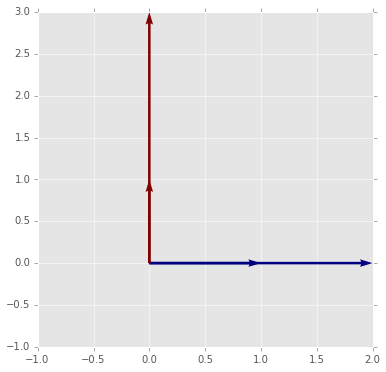

In [79]:
# A diagnoal matrix simply scales the vectors
# This gives insight into what the eigendecomposition tells us
plot_matrix_transform(A1)

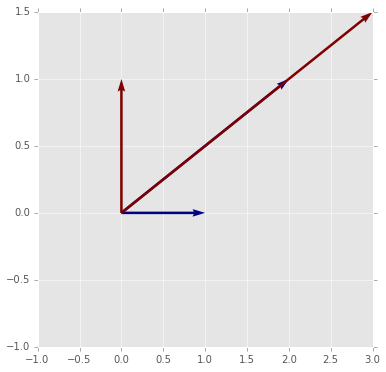

In [80]:
# A singluar matrix collapses one vector onto another
# The determinant is zero becasue the parallelogram area is zero
plot_matrix_transform(A2)

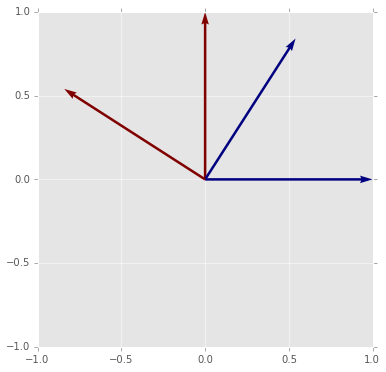

In [81]:
# An orthogoanl matrix preservees length and angle
# Hence the area is also preserved and the determinant is 1
# In 2D it is etiher a rotation (shown here)
plot_matrix_transform(A3)

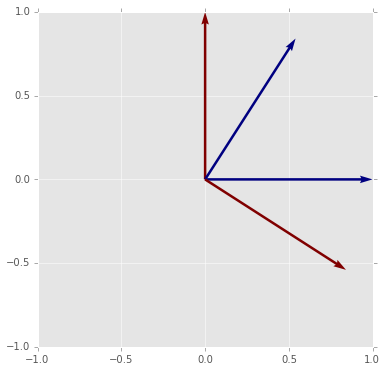

In [82]:
# or a refelction
# The reflection does not preserve orietnation
# This is indicated by the determinatn being -1
plot_matrix_transform(A4)

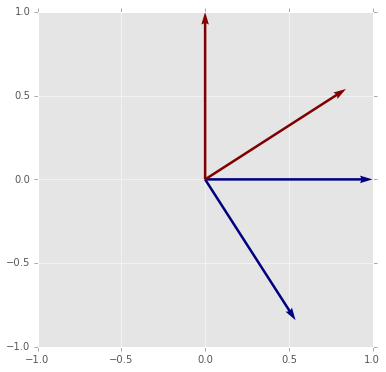

In [83]:
# The tranpose of an orthogonal matrix is its inverse
plot_matrix_transform(A3.T)

In [84]:
def transform(u, v):
    """Retruns a matrix that converts u into e1 (1,0) and v into e2 (0,1)."""
    return la.inv(np.vstack([u, v]).T)

u = np.random.random(2)
v = np.random.random(2)

M = transform(u, v)
print u, M.dot(u)
print v, M.dot(v)

[ 0.0276  0.8173] [ 1.  0.]
[ 0.2418  0.0561] [ 0.  1.]


**8**. Find and plot the least squares fit to the given values of $x$ and $y$ for the following:

- a constant
- a quadratic equation
- a 5th order polynomial
- a polynomial of order 50

/Users/cliburn/anaconda/lib/python2.7/site-packages/numpy/lib/polynomial.py:588: RankWarning: Polyfit may be poorly conditioned
  warnings.warn(msg, RankWarning)


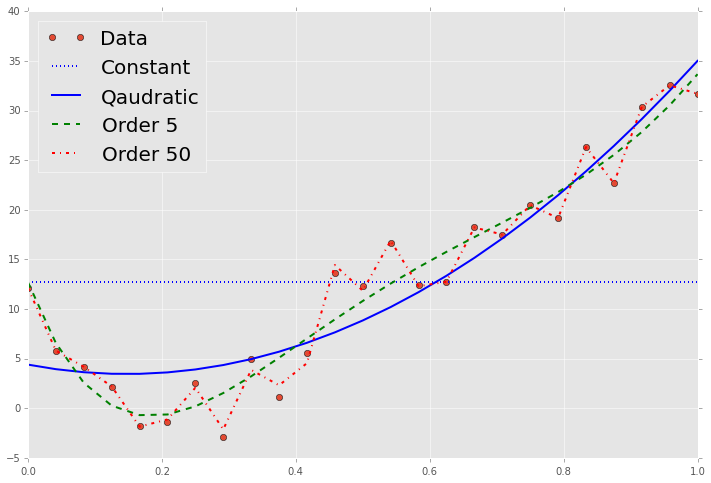

In [85]:
plt.figure(figsize=(12,8))
x = np.load('x.npy')
y = np.load('y.npy')
plt.plot(x, y, 'o')

### YOUR CODE HERE
p0 = np.poly1d(np.polyfit(x, y, 0))
p2 = np.poly1d(np.polyfit(x, y, 2))
p5 = np.poly1d(np.polyfit(x, y, 5))
p50 = np.poly1d(np.polyfit(x, y, 50))

plt.plot(x, p0(x), 'b:', linewidth=2)
plt.plot(x, p2(x), 'b-', linewidth=2)
plt.plot(x, p5(x), 'g--', linewidth=2)
plt.plot(x, p50(x), 'r-.', linewidth=2)
plt.legend(['Data', 'Constant', 'Qaudratic', 'Order 5', 'Order 50'], loc='best', fontsize=20);

In [86]:
%load_ext version_information

%version_information numpy, scipy

Software versions
Python 2.7.9 64bit [GCC 4.2.1 (Apple Inc. build 5577)]
IPython 2.3.1
OS Darwin 13.4.0 x86_64 i386 64bit
numpy 1.9.1
scipy 0.14.0
Thu Jan 22 15:43:33 2015 EST